## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP1 - Exploración de los datos

---

En esta libreta se realiza un EDA -básico- de los datos del escenario. 

---

##### Importación de librerías

In [1]:
import pandas as pd
# from ydata_profiling import ProfileReport
import dtale as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

----

##### Lectura de los datasets

In [2]:
df_creditos = pd.read_csv("../../data/raw/datos_creditos.csv", sep=";")
df_creditos.head(1)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


In [3]:
df_tarjetas = pd.read_csv("../../data/raw/datos_tarjetas.csv", sep=";")
df_tarjetas.head(1)

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0


----

##### Descripción de los datasets

In [4]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

In [5]:
print("Descripción del dataset 'datos_creditos'")
reporte_descripcion_dataset(df_creditos)

Descripción del dataset 'datos_creditos'
Columnas del dataset:

id_cliente
edad
importe_solicitado
duracion_credito
antiguedad_empleado
situacion_vivienda
ingresos
objetivo_credito
pct_ingreso
tasa_interes
estado_credito
falta_pago

Cantidad de filas: 10127


In [6]:
print("Descripción del dataset 'datos_tarjetas'")
reporte_descripcion_dataset(df_tarjetas)

Descripción del dataset 'datos_tarjetas'
Columnas del dataset:

id_cliente
antiguedad_cliente
estado_civil
estado_cliente
gastos_ult_12m
genero
limite_credito_tc
nivel_educativo
nivel_tarjeta
operaciones_ult_12m
personas_a_cargo

Cantidad de filas: 10127


----

##### Obtención de metadatos

In [7]:
# Se usa la librería dtale para poder obtener una vista interactiva de los datos

# Dataset: datos_creditos

creditos = dt.show(df_creditos)
creditos.open_browser()

In [8]:
# Dataset: datos_tarjetas

tarjetas = dt.show(df_tarjetas)
tarjetas.open_browser()

2024-04-21 01:01:05,901 - ERROR    - Exception occurred while processing request: Can only use .str accessor with string values!
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 119, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 3135, in get_column_analysis
    return jsonify(**analysis.build())
                     ^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/column_analysis.py", line 141, in build
    return_data, code = self.analysis.build(self)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/column_analysis.py", line 457, in build
    hist = self.build_hist(s, code)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/column_analysis.py", line 511, in build_hist
    pd.value_count

----

##### Gráficos de interés

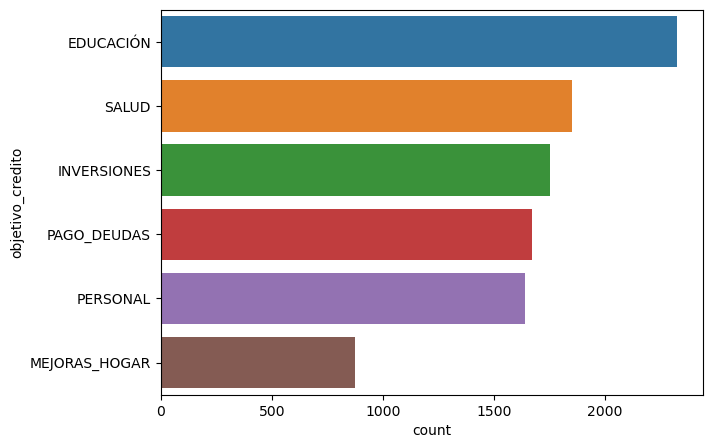

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(y=df_creditos['objetivo_credito'], order=df_creditos['objetivo_credito'].value_counts().index)
plt.show()